In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
data = "brest cancer.txt"
df = pd.read_csv(data, header = None)

### **Explaratory Data Analysis**

In [4]:
df.shape

(699, 11)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
# Renaming the columns

col_names = ['id', 'Clump_thickness', 'Uniformity_cell_size', 'Uniformity_Cell_Shape',
             'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
               'Bland_Chromatin', 'Normal_Nuclei', 'Mitoses', 'Class']

df.columns = col_names
df.columns

Index(['id', 'Clump_thickness', 'Uniformity_cell_size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nuclei', 'Mitoses', 'Class'],
      dtype='object')

In [7]:
df.head()

,id,Clump_thickness,Uniformity_cell_size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nuclei,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [8]:
# Dropping the unnecessary column

df.drop('id', axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_cell_size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nuclei                699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [10]:
# Frequency distribution of values in variables

for var in df.columns:
    print(df[var].value_counts())

Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_cell_size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
N

The distribution of values shows that data type of `Bare_Nuclei` is of type integer. But the summary of the dataframe shows that it is type object. So, I will explicitly convert its data type to integer.

In [12]:
# Converting data type of Bare_nuclei to integer

df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors = 'coerce')

In [13]:
df.dtypes

Clump_thickness                  int64
Uniformity_cell_size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nuclei                    int64
Mitoses                          int64
Class                            int64
dtype: object

### Summary of variables


- There are 10 numerical variables in the dataset.


- All of the variables are of discrete type.


- Out of all the 10 variables, the first 9 variables are feature variables and last variable `Class` is the target variable.




### Missing values in the variables

In [16]:
# Checking for the missing values

df.isnull().sum()

Clump_thickness                 0
Uniformity_cell_size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nuclei                   0
Mitoses                         0
Class                           0
dtype: int64

We can see that the `Bare_Nuclei` column contains missing values. We need to dig deeper to find the frequency distribution of 
values of `Bare_Nuclei`.

In [18]:
# Checking for 'na' values 

df.isna().sum()

Clump_thickness                 0
Uniformity_cell_size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nuclei                   0
Mitoses                         0
Class                           0
dtype: int64

We can see that the `Bare_Nuclei` column contains 16 `nan` values.

In [20]:
# Checking for frequency distribution of 'Bare_Nuclei' column

df['Bare_Nuclei'].value_counts()

Bare_Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [21]:
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [22]:
# Checking for nan values in 'Bare_Nuclei' column

df['Bare_Nuclei'].isna().sum()

# There are 16 nan values in the data. We will impute missing values after the train_test_split

16

In [23]:
# Checking frequency distribution of target variable 'Class' variable

df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

In [24]:
# Checking percentage of frequency distribution of 'Class'

df['Class'].value_counts() / np.float64(len(df))

Class
2    0.655222
4    0.344778
Name: count, dtype: float64

We can see that the `Class` variable contains 2 class labels - `2` and `4`. `2` stands for benign and `4` stands for malignant cancer.

In [26]:
# Outliers in numerical variables

print(round(df.describe(), 2))

       Clump_thickness  Uniformity_cell_size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

# **Data Visualization**

Now, we have a basic understanding of our data. I will supplement it with some data visualization to get better understanding
of our data.

### Univariate Plots

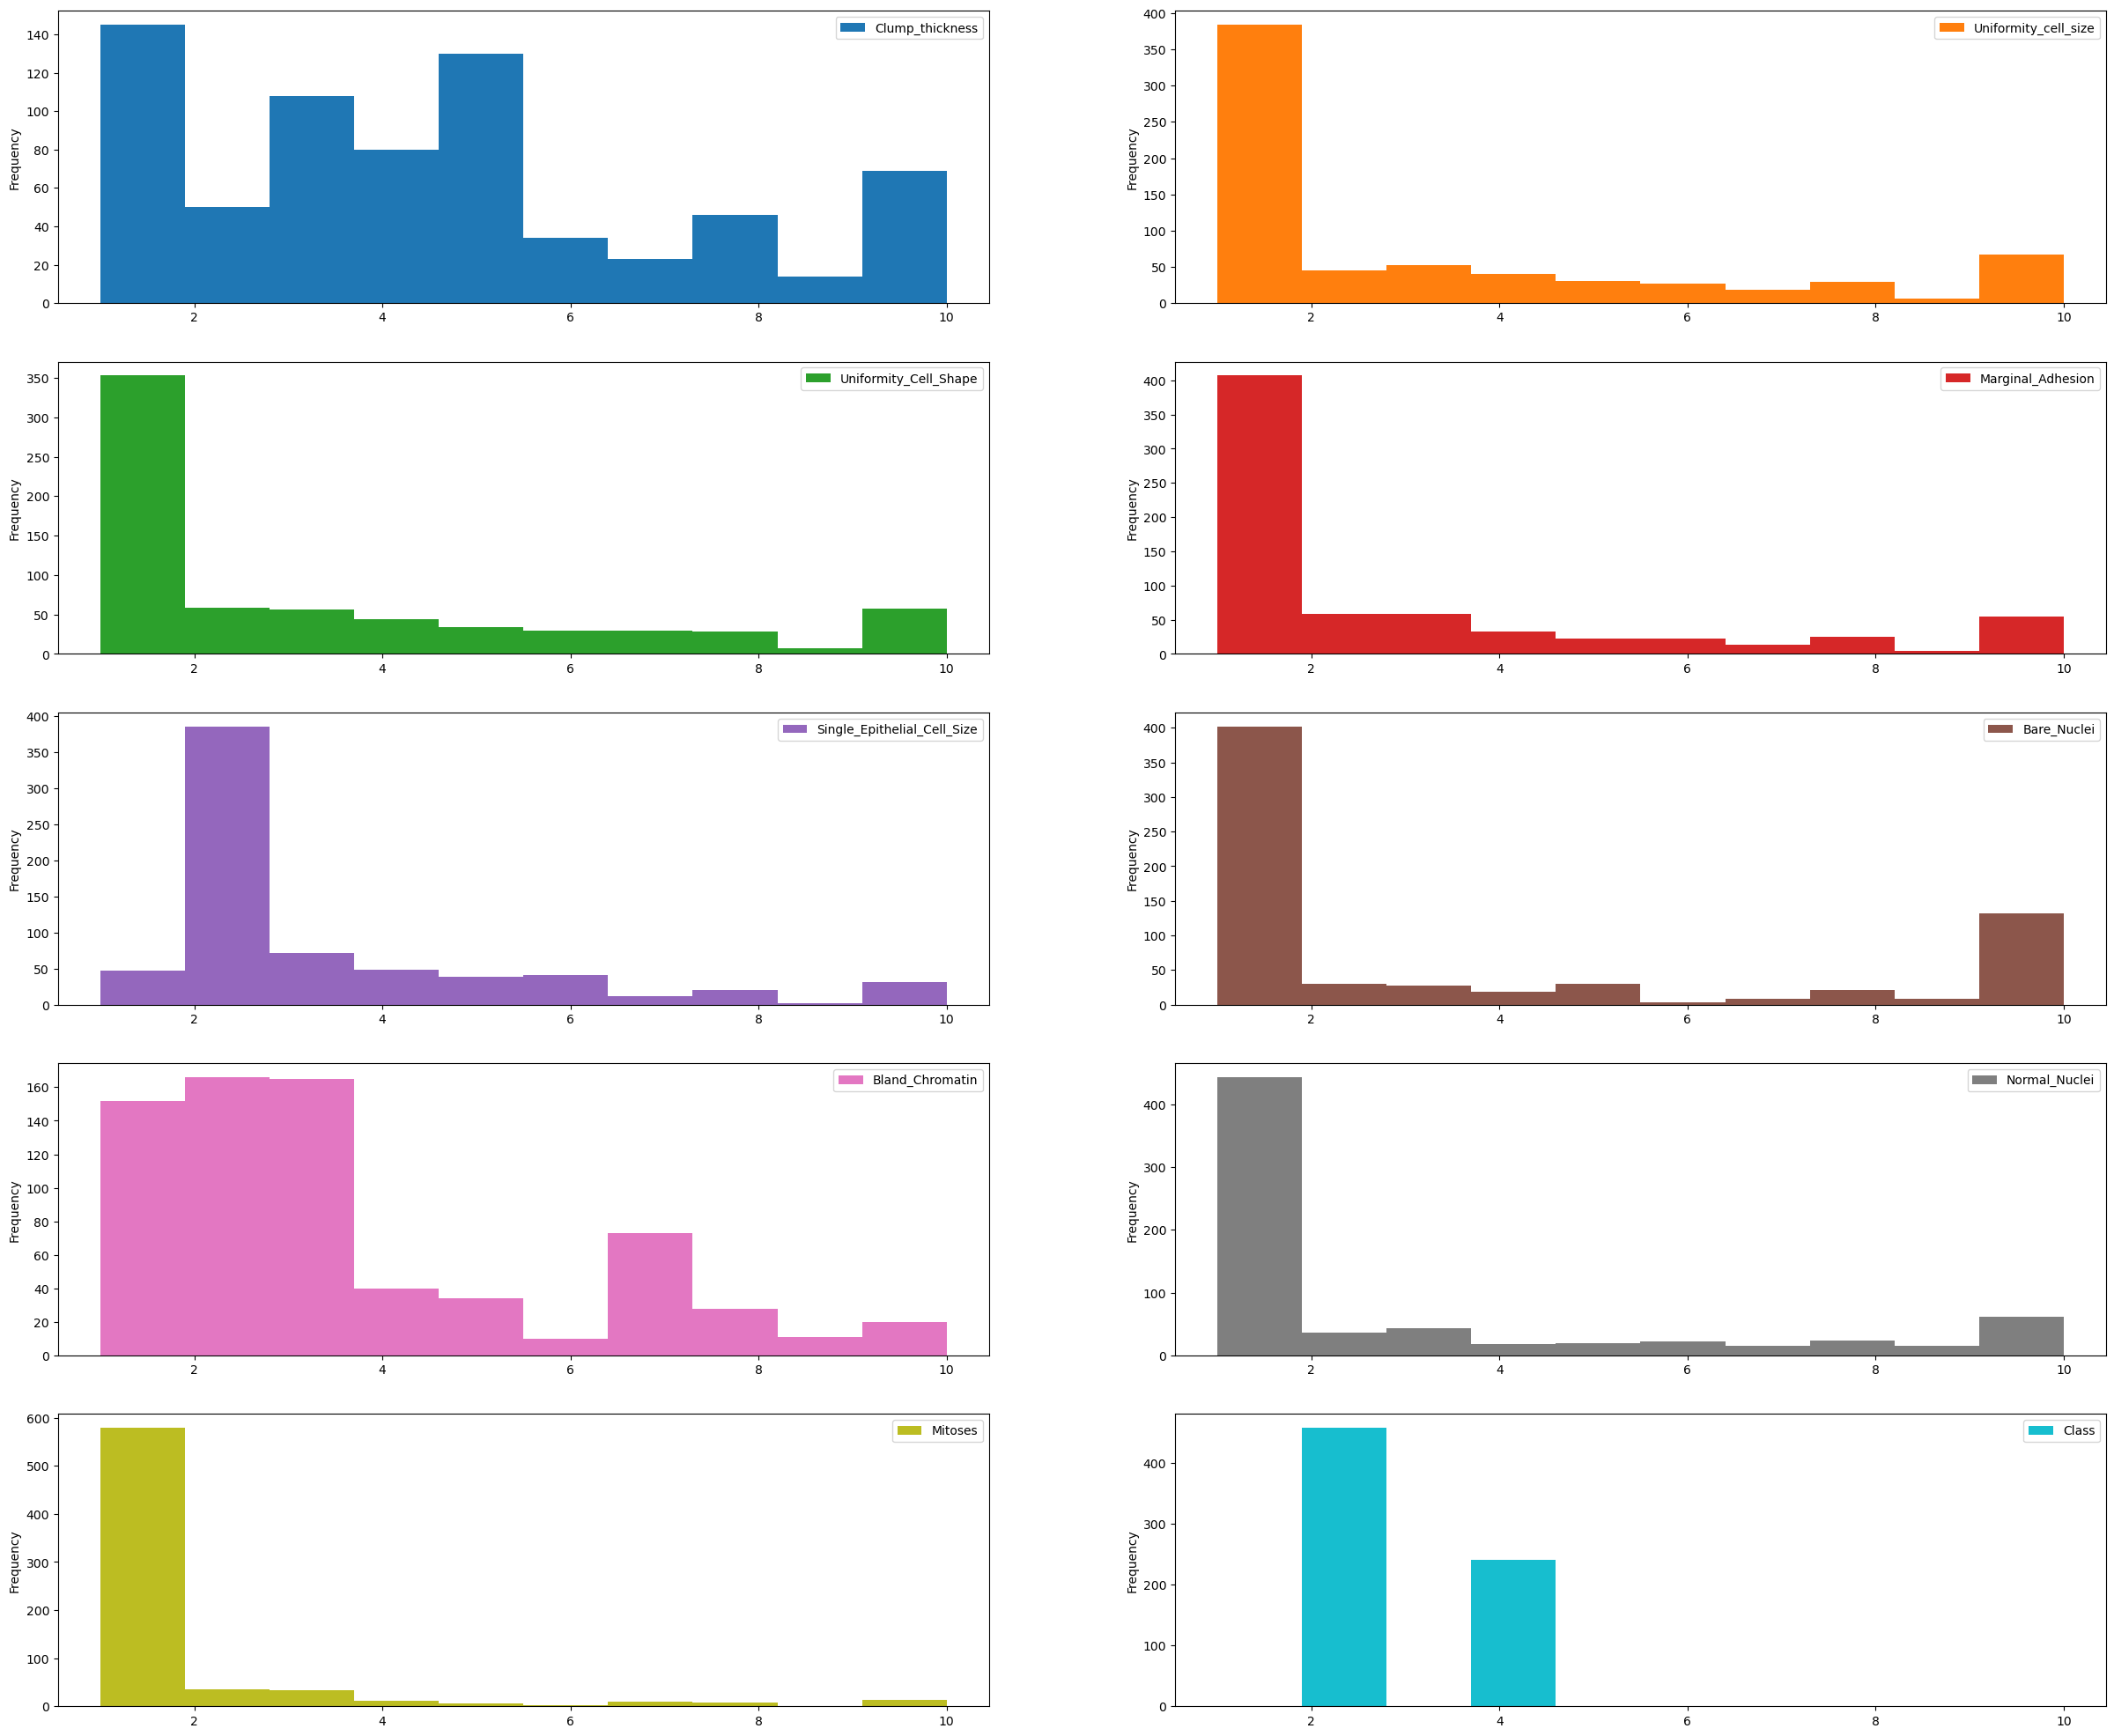

In [30]:
# Checking for distribution of variables

plt.rcParams['figure.figsize'] = (30, 25)

df.plot(kind = 'hist', bins = 10, subplots = True, layout = (5, 2), sharex = False, sharey = False)
plt.show()

All the variables are positively skewed

### Multivariate Plots

### Estimating Correlation Co-efficient

Our dataset is very small. So, we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes. We can compute it using the `df.corr()` method as follows:-

In [35]:
correlation = df.corr()

Our target variable is `Class`. So, we should check how each attribute correlates with the `Class` variable. We can do it as follows:-

In [37]:
correlation['Class'].sort_values(ascending = False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_cell_size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nuclei                  0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

### Interpretation 

- The correlation coefficient ranges from -1 to +1. 

- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between `Class` and `Bare_Nuclei`, `Class` and `Uniformity_Cell_Shape`, `Class` and `Uniformity_Cell_Size`.

- When it is clsoe to -1, it means that there is a strong negative correlation. When it is close to 0, it means that there is no correlation. 

- We can see that all the variables are positively correlated with `Class` variable. Some variables are strongly positive correlated while some variables are negatively correlated.

### Correlation Patterns and relationships

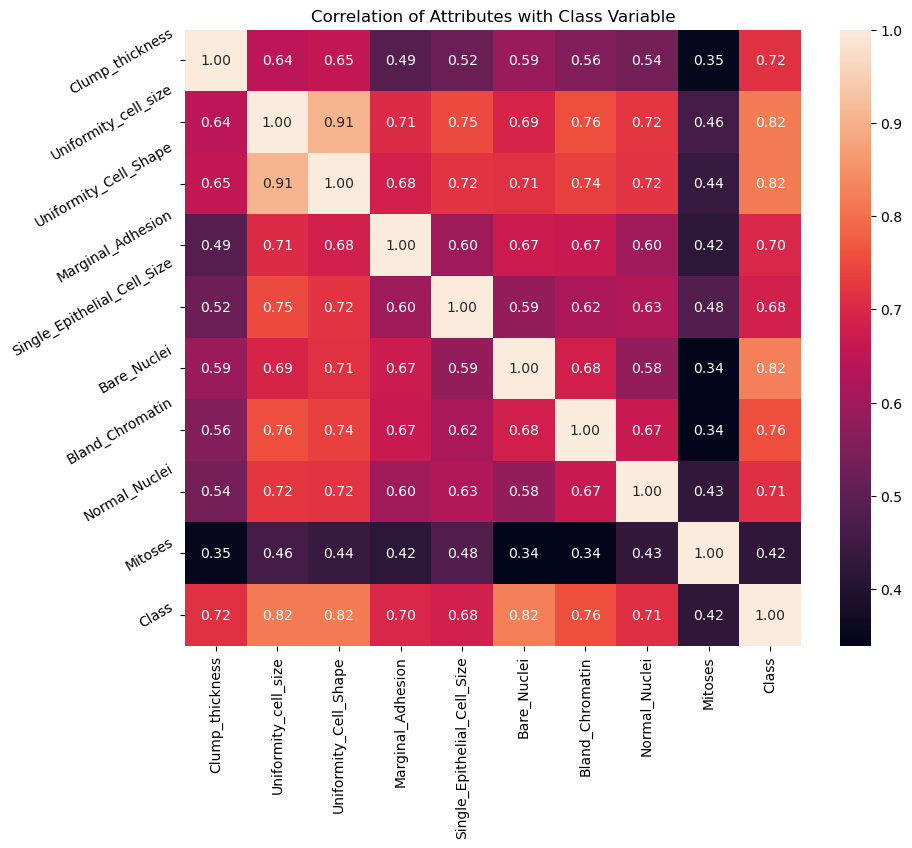

In [40]:
# Correlation heatmap

plt.figure(figsize = (10, 8))

plt.title('Correlation of Attributes with Class Variable')
a = sns.heatmap(correlation, square = True, annot = True, fmt = '.2f', linecolor = 'white')
a.set_xticklabels(a.get_xticklabels(), rotation = 90)
a.set_yticklabels(a.get_yticklabels(), rotation = 30)
plt.show()

### Interpretation


From the above correlation heat map, we can conclude that :-

1. `Class` is highly positive correlated with `Uniformity_Cell_Size`, `Uniformity_Cell_Shape` and `Bare_Nuclei`. (correlation coefficient = 0.82).

2. `Class` is positively correlated with `Clump_thickness`(correlation coefficient=0.72), `Marginal_Adhesion`(correlation coefficient=0.70), `Single_Epithelial_Cell_Size)`(correlation coefficient = 0.68) and `Normal_Nucleoli`(correlation coefficient=0.71).

3. `Class` is weekly positive correlated with `Mitoses`(correlation coefficient=0.42).

4. The `Mitoses` variable is weekly positive correlated with all the other variables(correlation coefficient < 0.50).

## **Declare Feature Vector and Target Variable**

In [43]:
x = df.drop(['Class'], axis = 1)
y = df['Class']

### **Splitting data into training and testing set**

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [46]:
# Checking the shape of x_train and x_test

x_train.shape, x_test.shape

((559, 9), (140, 9))

## **Feature Engineering**

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [49]:
# Checking data types in x_train

x_train.dtypes

Clump_thickness                  int64
Uniformity_cell_size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nuclei                    int64
Mitoses                          int64
dtype: object

In [50]:
# Checking for missing values in numerical variables in x_train

x_train.isnull().sum()

Clump_thickness                 0
Uniformity_cell_size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nuclei                   0
Mitoses                         0
dtype: int64

In [51]:
# Checking for missing values in numerical variables in x_test

x_test.isnull().sum()

Clump_thickness                0
Uniformity_cell_size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nuclei                  0
Mitoses                        0
dtype: int64

In [52]:
# Printing percentage of misssing values in the numerical variables in training set

for col in x_train.columns:
    if x_train[col].isnull().mean() > 0:
        print(col, round(x_train[col].isnull().mean(), 4))


Bare_Nuclei 0.0233


### Assumption


I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.


I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [54]:
# impute missing values in x_train and x_test with respective column median in x_train

for df1 in [x_train, x_test]:
    for col in df1.columns:
        col_median = x_train[col].median()
        df1[col].fillna(col_median, inplace = True)  # replace missing values

In [55]:
x_train.isnull().sum()

Clump_thickness                0
Uniformity_cell_size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nuclei                  0
Mitoses                        0
dtype: int64

In [56]:
x_test.isnull().sum()

Clump_thickness                0
Uniformity_cell_size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nuclei                  0
Mitoses                        0
dtype: int64

In [57]:
x_train.head()

,Clump_thickness,Uniformity_cell_size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nuclei,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1


In [58]:
x_test.head()

,Clump_thickness,Uniformity_cell_size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nuclei,Mitoses
476,4,1,2,1,2,1.0,1,1,1
531,4,2,2,1,2,1.0,2,1,1
40,6,6,6,9,6,1.0,7,8,1
432,5,1,1,1,2,1.0,2,2,1
14,8,7,5,10,7,9.0,5,5,4


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

# **Feature Scaling**

In [61]:
cols = x_train.columns

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [63]:
x_train = pd.DataFrame(x_train, columns = [cols])

In [64]:
x_test = pd.DataFrame(x_test, columns = [cols])

In [65]:
x_train.head()

,Clump_thickness,Uniformity_cell_size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nuclei,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


## **Fitting K-Neighbours Classifier to the training set**

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

# Fitting the model into the training set
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### **Predicting the test set results**

In [69]:
y_pred = knn.predict(x_test)
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

### predict_proba method


**predict_proba** method gives the probabilities for the target variable(2 and 4) in this case, in array form.

`2 is for probability of benign cancer` and `4 is for probability of malignant cancer.`

In [71]:
# Probability of getting output as 2 - benign cancer

knn.predict_proba(x_test)[:, 0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [72]:
# probability of getting output as 4 - malignant cancer

knn.predict_proba(x_test)[:, 1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

## **Checking for accuracy score**

In [74]:
from sklearn.metrics import accuracy_score

print('Model Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model Accuracy Score: 0.9714


### Comparing the train-set and test-set accuracy


Now, We will compare the train-set and test-set accuracy to check for overfitting.

In [76]:
y_pred_train = knn.predict(x_train)

In [77]:
print('Training Accuracy Score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Training Accuracy Score: 0.9821


### Checking for overfitting and underfitting

In [79]:
# Printing the scores on training and testing set

print('Training set Score: {:.4f}'.format(knn.score(x_train, y_train)))
print('Testing set Score: {:.4f}'.format(knn.score(x_test, y_test)))

Training set Score: 0.9821
Testing set Score: 0.9714


The training-set accuracy score is 0.9821 while the test-set accuracy to be 0.9714. These two values are quite comparable. So, there is no overfitting. 


### Compare model accuracy with null accuracy


So, the model accuracy is 0.9714. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [82]:
y_test.value_counts()

Class
2    85
4    55
Name: count, dtype: int64

We can see that the occurences of most frequent class is 85. So, we can calculate null accuracy by dividing 85 by total number of occurences.

In [84]:
# Check null accuracy score

null_acc = (85 / (85 + 55))
print("Null accuracy score: {0:0.4f}".format(null_acc))

Null accuracy score: 0.6071


We can see that our model accuracy score is 0.9714 but null accuracy score is 0.6071. So, we can conclude that our K Nearest Neighbors model is doing a very good job in predicting the class labels.

# **Rebuild kNN Classification model using different values of k**

We have build the kNN classification model using k=3. Now, We will increase the value of k and see its effect on accuracy.

In [87]:
# Rebuilding KNN Classifier model with k = 5

knn_5 = KNeighborsClassifier(n_neighbors = 5)

# Fitting the model to the training set
knn_5.fit(x_train, y_train)

# Predicting on the test set
y_pred_5 = knn_5.predict(x_test)

print('Model Accuracy Score with  k = 5: {0:0.4f}'.format(accuracy_score(y_test, y_pred_5)))


Model Accuracy Score with  k = 5: 0.9714


In [88]:
# Rebuilding KNN Classifier model with k = 6

knn_6 = KNeighborsClassifier(n_neighbors = 6)

# Fitting the model to the training set
knn_6.fit(x_train, y_train)

# Predicting on the test set
y_pred_6 = knn_6.predict(x_test)

print('Model Accuracy Score with  k = 6: {0:0.4f}'.format(accuracy_score(y_test, y_pred_6)))


Model Accuracy Score with  k = 6: 0.9786


In [89]:
# Rebuilding KNN Classifier model with k = 7

knn_7 = KNeighborsClassifier(n_neighbors = 7)

# Fitting the model to the training set
knn_7.fit(x_train, y_train)

# Predicting on the test set
y_pred_7 = knn_7.predict(x_test)

print('Model Accuracy Score with  k = 7: {0:0.4f}'.format(accuracy_score(y_test, y_pred_7)))


Model Accuracy Score with  k = 7: 0.9786


In [90]:
# Rebuilding KNN Classifier model with k = 8

knn_8 = KNeighborsClassifier(n_neighbors = 8)

# Fitting the model to the training set
knn_8.fit(x_train, y_train)

# Predicting on the test set
y_pred_8 = knn_8.predict(x_test)

print('Model Accuracy Score with  k = 8: {0:0.4f}'.format(accuracy_score(y_test, y_pred_8)))


Model Accuracy Score with  k = 8: 0.9786


In [91]:
# Rebuilding KNN Classifier model with k = 9

knn_9 = KNeighborsClassifier(n_neighbors = 9)

# Fitting the model to the training set
knn_9.fit(x_train, y_train)

# Predicting on the test set
y_pred_9 = knn_9.predict(x_test)

print('Model Accuracy Score with  k = 9: {0:0.4f}'.format(accuracy_score(y_test, y_pred_9)))


Model Accuracy Score with  k = 9: 0.9714


### Interpretation


Our original model accuracy score with k=3 is 0.9714. Now, we can see that we get same accuracy score of 0.9714 with k=5. But, if we increase the value of k further, this would result in enhanced accuracy.


With k=6,7,8 we get accuracy score of 0.9786. So, it results in performance improvement.


If we increase k to 9, then accuracy decreases again to 0.9714.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

## **Confusion Matrix**

In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix\n\n', cm)
print('\nTrue Positives (TP): ', cm[0, 0])
print('\nTrue Negatives (TN): ', cm[1, 1])
print('\nFalse Positives (FP): ', cm[0, 1])
print('\nFalse Negatives (FN): ', cm[1, 0])

Confusion Matrix

 [[83  2]
 [ 2 53]]

True Positives (TP):  83

True Negatives (TN):  53

False Positives (FP):  2

False Negatives (FN):  2


The confusion matrix shows `83 + 53 = 136 correct predictions` and `2 + 2 = 4 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 83


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 53


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 2 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 2 `(Type II error)`

In [97]:
# Printing the confusion matrix for k = 7 and slice it into 4 parts

cm_7 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix for k = 7: \n", cm_7)
print('\n\nTrue Positives (TP): ', cm_7[0, 0])
print('\nTrue Negatives (TN): ', cm_7[1, 1])
print('\nFalse Positives (FP): ', cm_7[0, 1])
print('\nFalse Negatives (FN): ', cm_7[1, 0])


Confusion Matrix for k = 7: 
 [[83  2]
 [ 2 53]]


True Positives (TP):  83

True Negatives (TN):  53

False Positives (FP):  2

False Negatives (FN):  2


The above confusion matrix shows `83 + 53 = 136 correct predictions` and `2 + 2 = 4 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 83


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 53


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 2 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 2 `(Type II error)`

<Axes: >

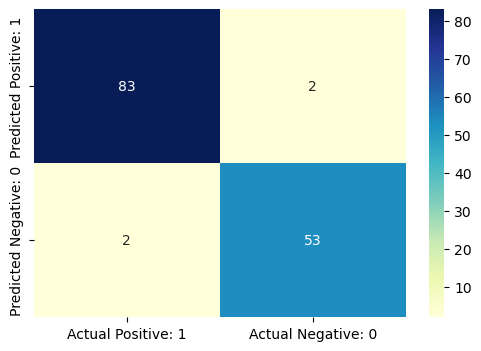

In [99]:
# Plotting the confusion matrix

plt.figure(figsize = (6, 4))

cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive: 1', 'Actual Negative: 0'],
                         index =  ['Predicted Positive: 1', 'Predicted Negative: 0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')


### **Classification Metrices**

In [101]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        85
           4       0.96      0.96      0.96        55

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [102]:
# Classification Accuracy

TP = cm[0, 0]
TN = cm[1, 1]
FN = cm[0, 1]
FP = cm[1, 0]

In [103]:
# Printing classification accuracy

classification_acc = (TP + TN) / (TP + TN + FP + FN)
print('Classification Accuracy: {0:0.4f}'.format(classification_acc))

Classification Accuracy: 0.9714


In [104]:
# Classification Error

classification_error = (FP + FN) / (TP + TN + FP + FN)
print('Classification Error: {0:0.4f}'.format(classification_error))

Classification Error: 0.0286


### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, `precision` can be defined as the ratio of `TP to (TP + FP)`.


In [106]:
# Printing the precision score

precision = TP / float(TP + FP)
print('Precision: {0:0.4f}'.format(precision))

Precision: 0.9765


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, `recall` can be given as the ratio of `TP to (TP + FN)`.



In [108]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity: {0:0.4f}'.format(recall))

Recall or Sensitivity: 0.9765


In [109]:
# Calculating False Positive Rate

print('False Positive Rate: {0:0.4f}'.format(FP / float(FP + TN)))  # False Positive

False Positive Rate: 0.0364


In [110]:
# Calculating Specificity

specificity = TN / (TN + FP)
print("Specificity: {0:0.4f}".format(specificity))

Specificity: 0.9636


### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.


In [112]:
f1_score = 2 * ((precision * recall) / (precision + recall))
print('F1-Score: {0:0.4f}'.format(f1_score))

F1-Score: 0.9765


In [113]:
import pickle

# Save the KNN model
with open('KNN_7_model.pkl', 'wb') as file:
    pickle.dump(knn_7, file)